## Titanic_Numerical_Submission

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.describe() # 891 rows

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

### Concatenate Train and Test & Check Missing Values

In [6]:
titanic = pd.concat([train,test], sort=False)
titanic.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


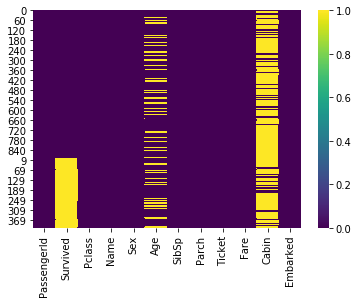

In [9]:
sns.heatmap(titanic.isnull(), cmap='viridis')

#### Observation : Age, Survived, Fare, Cabin and Embarked has missing values

#### Treat Age & Fare

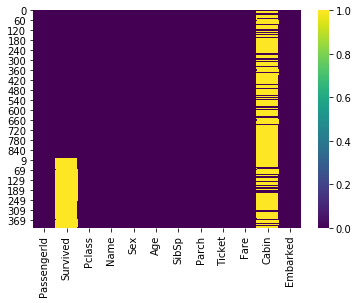

In [13]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].mean())
sns.heatmap(titanic.isnull(), cmap='viridis')

In [14]:
# Check how many missing values are there
# Numpy function is used to get count
np.count_nonzero(titanic['Cabin'].isnull())

1014

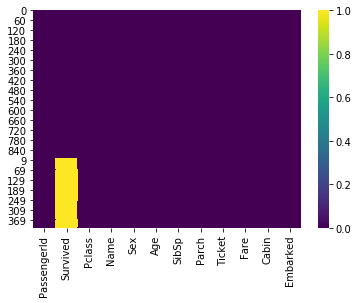

In [16]:
titanic['Cabin'] = titanic['Cabin'].fillna('Missing')
sns.heatmap(titanic.isnull(), cmap='viridis')

In [23]:
titanic['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [19]:
titanic['Embarked'].value_counts().idxmax()

'S'

In [20]:
titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().idxmax())

In [24]:
titanic['Embarked']=titanic['Embarked'].fillna('S')

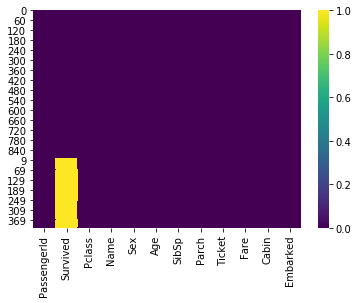

In [26]:
sns.heatmap(titanic.isnull(), cmap='viridis')

#### Model 1 : Numericals Only

In [28]:
titanic_num = titanic.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin','Embarked'], axis=1)

In [29]:
titanic_num.head()

Survived  Pclass   Age  SibSp  Parch     Fare
0       0.0       3  22.0      1      0   7.2500
1       1.0       1  38.0      1      0  71.2833
2       1.0       3  26.0      0      0   7.9250
3       1.0       1  35.0      1      0  53.1000
4       0.0       3  35.0      0      0   8.0500

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [31]:
# Divide Dataset into train and test after cleaning missing values
# Get Train
t_train = titanic_num.iloc[:891,]
t_train.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.735277    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.002218    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.881138    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [32]:
# Get Test
s_test = titanic_num.iloc[891:,]
s_test.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count       0.0  418.000000  418.000000  418.000000  418.000000  418.000000
mean        NaN    2.265550   30.192052    0.447368    0.392344   35.621610
std         NaN    0.841838   12.635527    0.896760    0.981429   55.840617
min         NaN    1.000000    0.170000    0.000000    0.000000    0.000000
25%         NaN    1.000000   23.000000    0.000000    0.000000    7.895800
50%         NaN    3.000000   29.881138    0.000000    0.000000   14.454200
75%         NaN    3.000000   35.750000    1.000000    0.000000   31.500000
max         NaN    3.000000   76.000000    8.000000    9.000000  512.329200

In [35]:
x=t_train.iloc[:,1:]
x.head()

Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500

In [36]:
y = t_train['Survived']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [41]:
import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=200) 

### Logistic Regression

In [42]:
# Import Libraries
from sklearn.linear_model import LogisticRegression

In [62]:
# Decision Tree
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=4)
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
# Build Model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
# Ravel is used to convert to a single ID array | https://www.geeksforgeeks.org/numpy-ravel-python

D:\Anaconda_Installation\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
logreg.score(x_test, y_test)

0.659217877094972

In [63]:
# Score using Decision Tree
reg.score(x_test,y_test)

0.09863680666512997

In [47]:
t_predictions = logreg.predict(x_test)
t_predictions

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0.])

## Evaluation on Test

In [49]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test,t_predictions))

              precision    recall  f1-score   support

         0.0       0.66      0.85      0.74       104
         1.0       0.65      0.40      0.50        75

   micro avg       0.66      0.66      0.66       179
   macro avg       0.66      0.62      0.62       179
weighted avg       0.66      0.66      0.64       179



#### Prediction for submission test

In [53]:
s_test

Survived  Pclass        Age  SibSp  Parch      Fare
0         NaN       3  34.500000      0      0    7.8292
1         NaN       3  47.000000      1      0    7.0000
2         NaN       2  62.000000      0      0    9.6875
3         NaN       3  27.000000      0      0    8.6625
4         NaN       3  22.000000      1      1   12.2875
5         NaN       3  14.000000      0      0    9.2250
6         NaN       3  30.000000      0      0    7.6292
7         NaN       2  26.000000      1      1   29.0000
8         NaN       3  18.000000      0      0    7.2292
9         NaN       3  21.000000      2      0   24.1500
10        NaN       3  29.881138      0      0    7.8958
11        NaN       1  46.000000      0      0   26.0000
12        NaN       1  23.000000      1      0   82.2667
13        NaN       2  63.000000      1      0   26.0000
14        NaN       1  47.000000      1      0   61.1750
15        NaN       2  24.000000      1      0   27.7208
16        NaN       2  35.000000      0      0   12.3500
17        NaN       3  21.000000      0      0    7.2250
18        NaN       3  27.000000      1      0    7.9250
19        NaN       3  45.000000      0      0    7.2250
20        NaN       1  55.000000      1      0   59.4000
21        NaN       3   9.000000      0      1    3.1708
22        NaN       1  29.881138      0      0   31.6833
23        NaN       1  21.000000      0      1   61.3792
24        NaN       1  48.000000      1      3  262.3750
25        NaN       3  50.000000      1      0   14.5000
26        NaN       1  22.000000      0      1   61.9792
27        NaN       3  22.500000      0      0    7.2250
28        NaN       1  41.000000      0      0   30.5000
29        NaN       3  29.881138      2      0   21.6792
..        ...     ...        ...    ...    ...       ...
388       NaN       3  21.000000      0      0    7.7500
389       NaN       3   6.000000      3      1   21.0750
390       NaN       1  23.000000      0      0   93.5000
391       NaN       1  51.000000      0      1   39.4000
392       NaN       3  13.000000      0      2   20.2500
393       NaN       2  47.000000      0      0   10.5000
394       NaN       3  29.000000      3      1   22.0250
395       NaN       1  18.000000      1      0   60.0000
396       NaN       3  24.000000      0      0    7.2500
397       NaN       1  48.000000      1      1   79.2000
398       NaN       3  22.000000      0      0    7.7750
399       NaN       3  31.000000      0      0    7.7333
400       NaN       1  30.000000      0      0  164.8667
401       NaN       2  38.000000      1      0   21.0000
402       NaN       1  22.000000      0      1   59.4000
403       NaN       1  17.000000      0      0   47.1000
404       NaN       1  43.000000      1      0   27.7208
405       NaN       2  20.000000      0      0   13.8625
406       NaN       2  23.000000      1      0   10.5000
407       NaN       1  50.000000      1      1  211.5000
408       NaN       3  29.881138      0      0    7.7208
409       NaN       3   3.000000      1      1   13.7750
410       NaN       3  29.881138      0      0    7.7500
411       NaN       1  37.000000      1      0   90.0000
412       NaN       3  28.000000      0      0    7.7750
413       NaN       3  29.881138      0      0    8.0500
414       NaN       1  39.000000      0      0  108.9000
415       NaN       3  38.500000      0      0    7.2500
416       NaN       3  29.881138      0      0    8.0500
417       NaN       3  29.881138      1      1   22.3583

[418 rows x 6 columns]

In [55]:
t_predictions = logreg.predict(s_test.iloc[:,1:])
t_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
# Get passenger id from test
PassengerId = test['PassengerId']
PassengerId

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [58]:
# Generate Submission file
NumSubmission = pd.DataFrame({ 'PassengerId' : PassengerId,'Survived' : t_predictions })

NumSubmission.to_csv("NumSubmission.csv", index=False)